## Libraries Imported

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import *

## Data Importing

In [2]:
df=pd.read_csv("Titanic-Dataset.csv") 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.drop(columns=["PassengerId","Name","Cabin","Ticket"],inplace=True) #dropping irrelevant features

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
c=["Age","Fare"]

## Handling null values

In [8]:
df["Age"].fillna(df["Age"].median(),inplace=True) ##filling null values with median age

## Data Visualisation

### Histplot

### Countplot

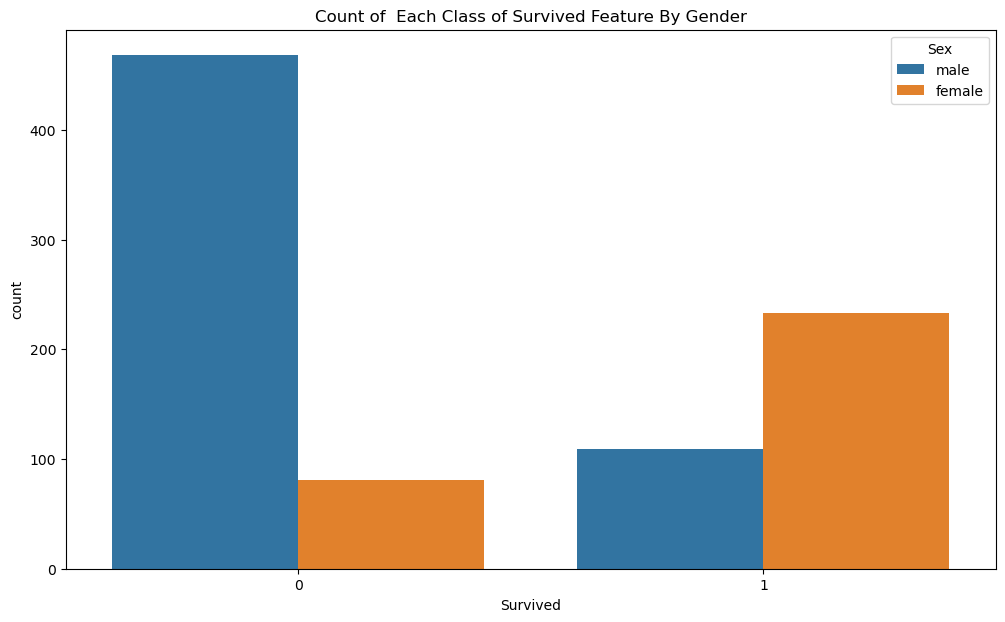

In [10]:
plt.figure(figsize=(12,7)) 
sns.countplot(data=df,x="Survived",hue="Sex") 
plt.xlabel("Survived") 
plt.title("Count of  Each Class of Survived Feature By Gender")
plt.show()

### Box Plot

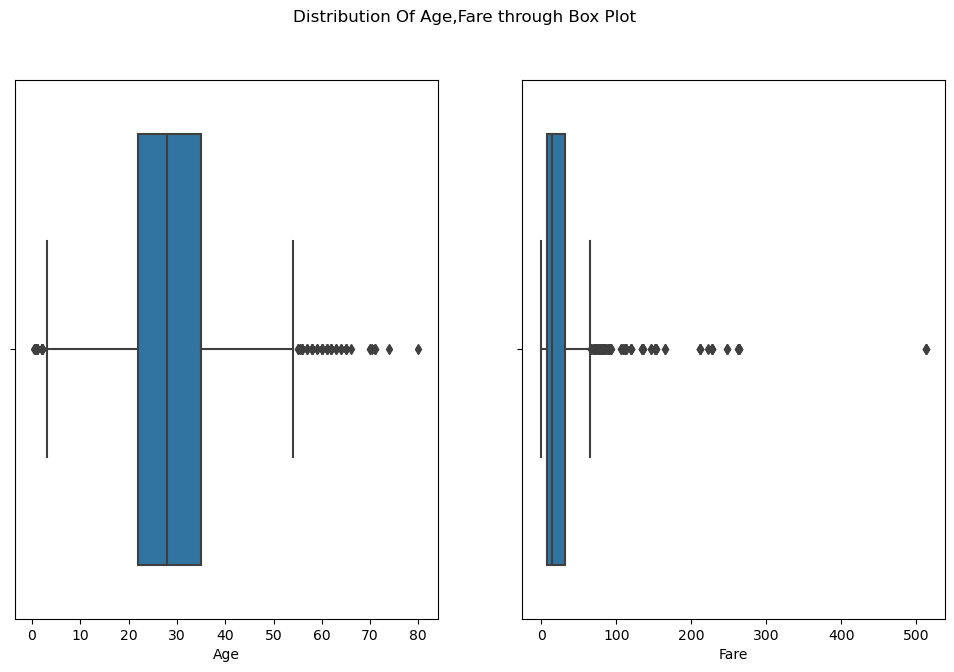

In [11]:
plt.figure(figsize=(12,7)) 
for i in range(len(c)): 
    plt.subplot(1,2,i+1)
    sns.boxplot(data=df,x=c[i]) 
    plt.xlabel(c[i]) 
plt.suptitle("Distribution Of Age,Fare through Box Plot")
plt.show()

### Hist Plot

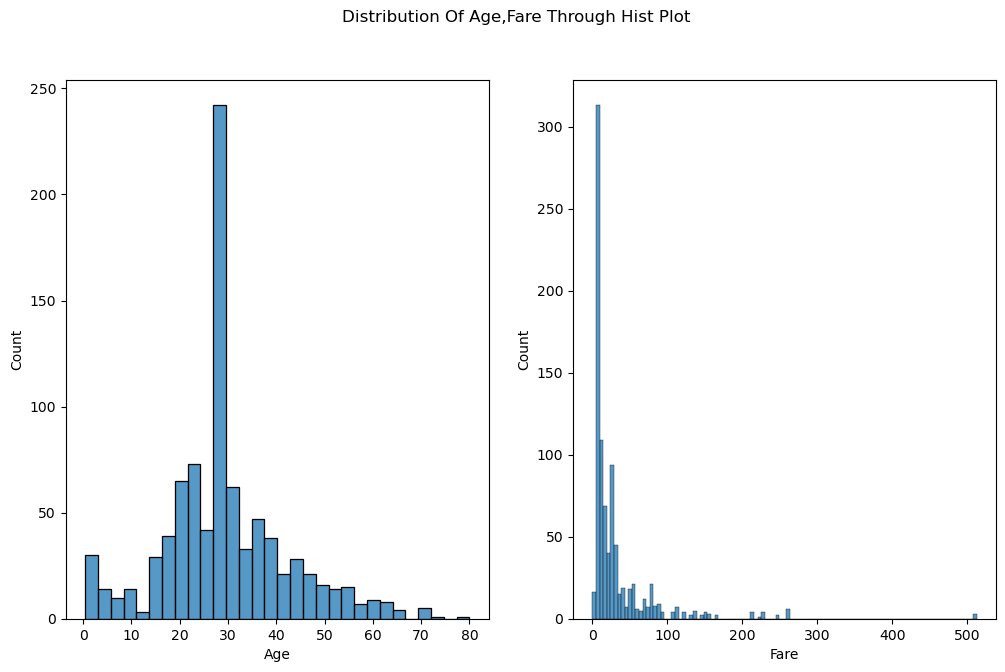

In [12]:
plt.figure(figsize=(12,7)) 
for i in range(len(c)): 
    plt.subplot(1,2,i+1)
    sns.histplot(data=df,x=c[i]) 
    plt.xlabel(c[i]) 
plt.suptitle("Distribution Of Age,Fare Through Hist Plot")
plt.show()

### Boxplot

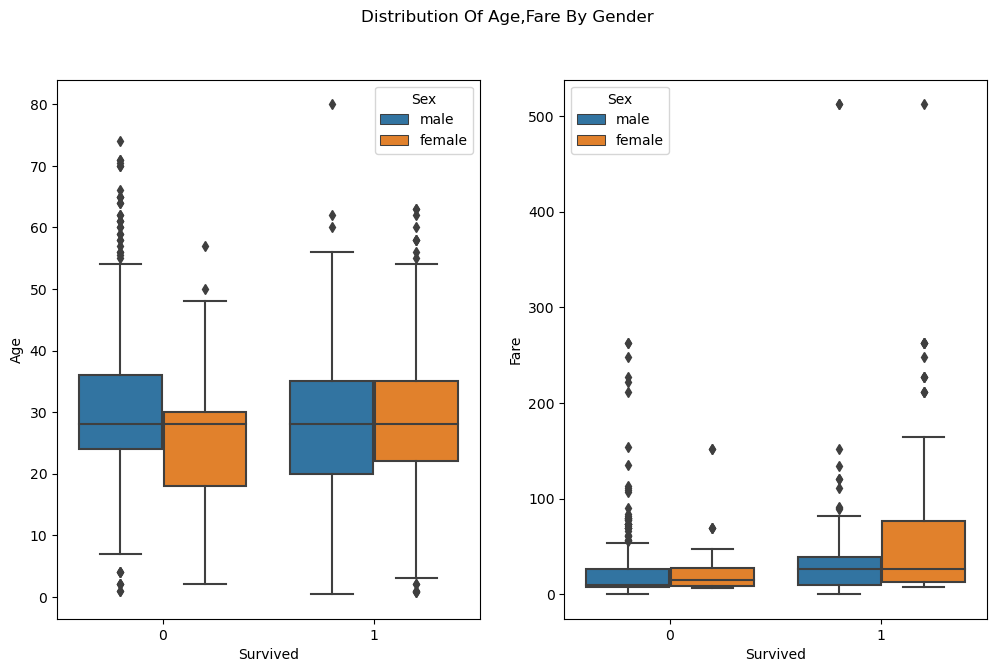

In [13]:
plt.figure(figsize=(12,7)) 
for i in range(len(c)): 
    plt.subplot(1,2,i+1)
    sns.boxplot(data=df,x="Survived",y=c[i],hue="Sex") 
    plt.xlabel("Survived") 
    plt.ylabel(c[i]) 
plt.suptitle("Distribution Of Age,Fare By Gender")
plt.show()

### Strip Plot

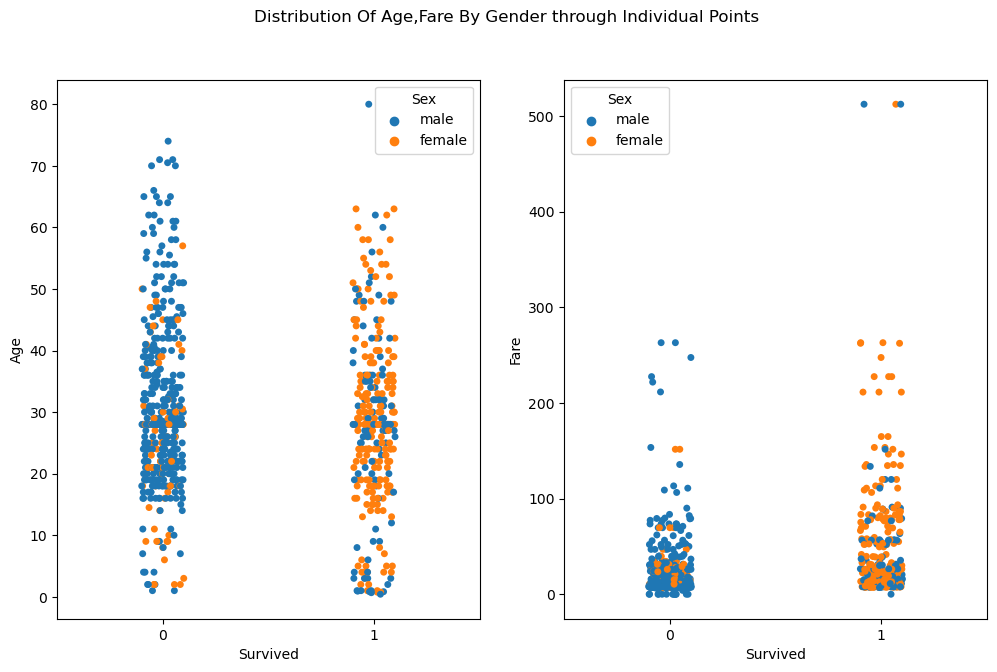

In [14]:
plt.figure(figsize=(12,7)) 
for i in range(len(c)): 
    plt.subplot(1,2,i+1)
    sns.stripplot(data=df,x="Survived",y=c[i],hue="Sex") 
    plt.xlabel("Survived") 
    plt.ylabel(c[i]) 
plt.suptitle("Distribution Of Age,Fare By Gender through Individual Points")
plt.show()

## Handling Outliers

In [15]:
#Treating values above 99 percent of  data as outliers and replacing with median 
df.loc[df["Age"]>(df["Age"].quantile(0.99)),"Age"]=df["Age"].median()  
df.loc[df["Fare"]>(df["Fare"].quantile(0.99)),"Age"]=df["Fare"].median()

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Feature Encoding

In [17]:
df=pd.get_dummies(df,columns=["Sex"],drop_first=True) 
df=pd.get_dummies(df,columns=["Embarked"],drop_first=True)


In [18]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [19]:
df["Sex_male"]=np.where(df["Sex_male"]==True,1,0)
df["Embarked_Q"]=np.where(df["Embarked_Q"]==True,1,0)
df["Embarked_S"]=np.where(df["Embarked_S"]==True,1,0)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


## Splitting Into Independent And Dependent

In [20]:
X=df.drop(columns=["Survived"])
Y=df["Survived"]

## Splittin Into Train And Test 

In [21]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

## Normalization

In [22]:
M=MinMaxScaler() 
M.fit(Xtrain) 
Xtrain.iloc[:,:]=M.transform(Xtrain.iloc[:,:])
Xtest.iloc[:,:]=M.transform(Xtest.iloc[:,:])

## Model Building

### Logistic Regression

In [23]:
Lr=LogisticRegression(solver="liblinear") 
Lr.fit(Xtrain,Ytrain) 
ypred=Lr.predict(Xtest)

In [24]:
accuracy_score(Ytest,ypred)

0.7988826815642458

In [25]:
print(classification_report(Ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier(criterion="entropy",min_samples_split=5) 
dt.fit(Xtrain,Ytrain) 
ypred=dt.predict(Xtest)

In [27]:
accuracy_score(Ytest,ypred)

0.7877094972067039

In [28]:
print(classification_report(Ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### RandomForestClassifier

In [29]:
dt=RandomForestClassifier(criterion="entropy",min_samples_split=9) 
dt.fit(Xtrain,Ytrain) 
ypred=dt.predict(Xtest)

In [30]:
accuracy_score(Ytest,ypred)

0.8379888268156425

In [31]:
print(classification_report(Ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

